In [1]:
library(igraph)
library(dplyr)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'dplyr'

The following objects are masked from 'package:igraph':

    as_data_frame, groups, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:

busStops <- read.csv("BusStops.csv")
routes = read.csv("Busroutes.csv")
highVolumeBusStop <- read.csv("High_volume_bus_stop.csv")

In [3]:
#edges <- routes %>% select(BusStopCode, NextBusStopCode, ServiceNo)
#weight is # of count per edges 
edges <- routes %>% select(BusStopCode, NextBusStopCode)%>% group_by(BusStopCode, NextBusStopCode) %>% summarize(n())

colnames(edges)[1] <- "from"
colnames(edges)[2] <- "to"
colnames(edges)[3] <- "weight"


# data preparation


In [4]:
# make sure nodes is unique
nodes <- busStops %>% select(BusStopCode, Latitude, Longitude)
nodes <-unique(nodes[,1:3])
nodes <- subset(nodes, nodes$BusStopCode != '')
#interested to look into high volume bus stop
nodes <- nodes[!(nodes$BusStopCode %in% highVolumeBusStop$PT_CODE),]

# remove edges that do not have valid nodes
edges <- edges[(edges$from %in% nodes$BusStopCode),]
edges <- edges[(edges$to %in% nodes$BusStopCode),]

edges <- edges[(edges$to %in% nodes$BusStopCode),]

#remove node that is not used in any edge
nodes <- nodes[((nodes$BusStopCode %in% edges$to) | (nodes$BusStopCode %in% edges$from)),]
  

# convert data to igraph object

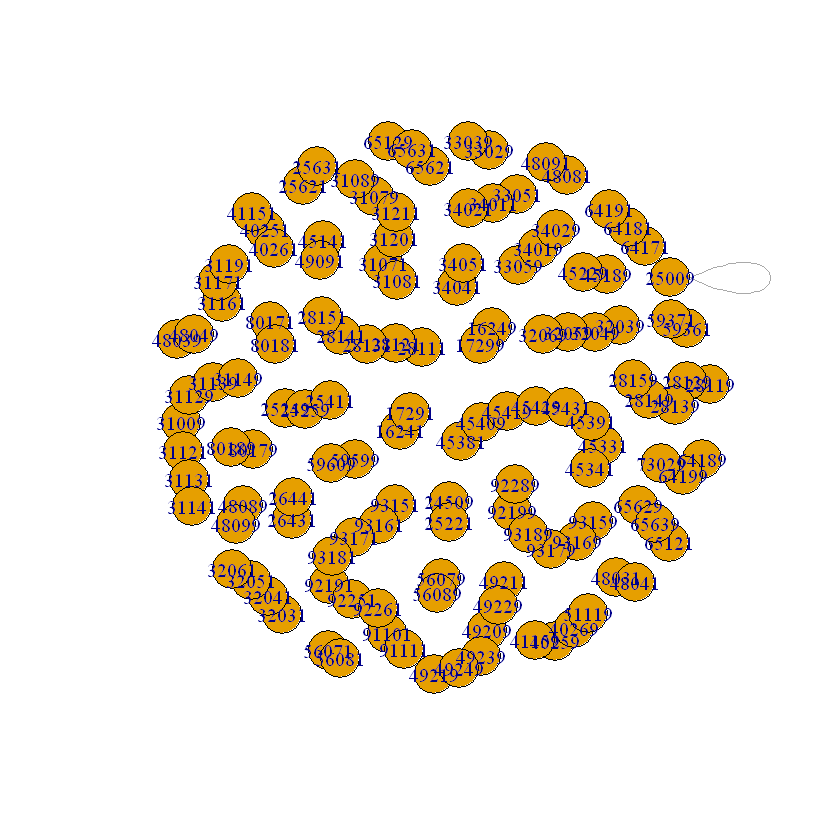

In [5]:
#routes_igraph <- graph_from_data_frame(d = edges[, 1:2], vertices = nodes$BusStopCode, directed = FALSE)
routes_igraph <- graph_from_data_frame(d = edges, vertices = nodes, directed =FALSE)
plot (routes_igraph)


In [6]:
routes_igraph

IGRAPH 5b1b0bb UNW- 130 91 -- 
+ attr: name (v/c), Latitude (v/n), Longitude (v/n), weight (e/n)
+ edges from 5b1b0bb (vertex names):
 [1] 16241--17291 16249--17299 25009--25009 24509--25221 25249--25259
 [6] 25259--25411 25621--25631 26431--26441 28111--28121 28121--28131
[11] 28119--28129 28131--28141 28129--28139 28141--28151 28139--28149
[16] 28149--28159 31009--31121 31071--31081 31071--31201 31079--31089
[21] 31121--31131 31009--31129 31131--31141 31129--31139 31139--31149
[26] 31161--31171 31171--31191 31201--31211 31079--31211 32031--32041
[31] 32041--32051 32039--32049 32051--32061 32049--32059 32059--32069
[36] 33029--33039 33051--34011 34011--34021 33059--34019 34019--34029
+ ... omitted several edges

In [7]:
##edges
E(routes_igraph )


+ 91/91 edges from 5b1b0bb (vertex names):
 [1] 16241--17291 16249--17299 25009--25009 24509--25221 25249--25259
 [6] 25259--25411 25621--25631 26431--26441 28111--28121 28121--28131
[11] 28119--28129 28131--28141 28129--28139 28141--28151 28139--28149
[16] 28149--28159 31009--31121 31071--31081 31071--31201 31079--31089
[21] 31121--31131 31009--31129 31131--31141 31129--31139 31139--31149
[26] 31161--31171 31171--31191 31201--31211 31079--31211 32031--32041
[31] 32041--32051 32039--32049 32051--32061 32049--32059 32059--32069
[36] 33029--33039 33051--34011 34011--34021 33059--34019 34019--34029
[41] 34041--34051 40251--40261 40259--41159 40259--40269 40251--41151
[46] 45141--49091 45189--45229 45331--45391 45331--45341 45391--45431
+ ... omitted several edges

In [9]:
##Vetices
V(routes_igraph )


+ 130/130 vertices, named, from 5b1b0bb:
  [1] 16241 16249 17291 17299 24509 25009 25221 25249 25259 25411 25621 25631
 [13] 26431 26441 28111 28119 28121 28129 28131 28139 28141 28149 28151 28159
 [25] 31009 31071 31079 31081 31089 31121 31129 31131 31139 31141 31149 31161
 [37] 31171 31191 31201 31211 32031 32039 32041 32049 32051 32059 32061 32069
 [49] 33029 33039 33051 33059 34011 34019 34021 34029 34041 34051 40251 40259
 [61] 40261 40269 41151 41159 45141 45189 45229 45331 45341 45381 45391 45409
 [73] 45419 45429 45431 48031 48039 48041 48049 48081 48089 48091 48099 49091
 [85] 49209 49211 49219 49229 49239 49249 51119 56071 56079 56081 56089 59361
 [97] 59371 59599 59609 64171 64181 64189 64191 64199 65121 65129 65621 65629
[109] 65631 65639 73029 80171 80179 80181 80189 91101 91111 92191 92199 92251
+ ... omitted several vertices

In [8]:
table(head_of(routes_igraph , E(routes_igraph )))
V(routes_igraph )$degree<-degree(routes_igraph )
gorder(routes_igraph ) 



  3   4   6   7   9  10  12  14  17  18  19  20  21  22  23  24  28  29  30  31 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 32  33  34  35  37  38  39  40  43  44  45  46  47  48  50  53  54  55  56  58 
  1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  67  69  71  72  73  74  75  78  79  82  83  84  88  89  90  91 
  1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   2   1   2   1 
 94  95  97  99 101 103 104 109 110 111 114 115 117 120 121 122 125 126 127 128 
  1   1   1   1   1   1   1   2   2   1   1   1   1   1   2   1   1   1   1   1 
129 130 
  2   2 

[1] 130

# community Detection - Clique detection


In [10]:
# The functions find cliques, ie. complete subgraphs in a graph
# clique.number calculates the size of the largest clique(s).
clique.number(routes_igraph )

#cliques find all complete subgraphs in the input graph, 
#obeying the size limitations given in the min and max arguments.
cliques(routes_igraph , min=4)

# How about we want to find smaller cliques
cliques(routes_igraph , min=3)

#maximal.cliques finds all maximal cliques in the input graph.
#A clique in maximal if it cannot be extended to a larger clique. 
#The largest cliques (maximum cliques) are always maximal, but a maximal clique is not neccessarily the largest.
maximal.cliques(routes_igraph )

# Maximum cliques: largest.cliques finds all largest cliques in the input 
# graph. A clique is largest if there is no other clique including more vertices.
largest.cliques(routes_igraph )


[1] 2

list()

list()

[[1]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93189 93179

[[2]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93189 92199

[[3]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 16249 17299

[[4]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 17291 16241

[[5]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 24509 25221

[[6]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 25249 25259

[[7]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 25259 25411

[[8]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 25621 25631

[[9]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 26431 26441

[[10]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 28111 28121

[[11]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 28119 28129

[[12]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 28121 28131

[[13]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 28129 28139

[[14]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 28131 28141

[[15]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 28139 28149

[[16]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 28141 28151

[

[[1]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93189 93179

[[2]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93189 92199

[[3]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93181 93171

[[4]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93181 92191

[[5]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93179 93169

[[6]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93171 93161

[[7]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93169 93159

[[8]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 93161 93151

[[9]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 92289 92199

[[10]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 92261 92251

[[11]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 92261 91101

[[12]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 92251 92191

[[13]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 91111 91101

[[14]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 80189 80179

[[15]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 80181 80171

[[16]]
+ 2/130 vertices, named, from 5b1b0bb:
[1] 73029 64199

[

# walktrap method

[1] 0.9491705

16241 16249 17291 17299 24509 25009 25221 25249 25259 25411 25621 25631 26431 
   38    39    38    39    37    40    37    18    18    18    28    28    25 
26441 28111 28119 28121 28129 28131 28139 28141 28149 28151 28159 31009 31071 
   25     8     7     8     7     8     7     8     7     8     7     3     6 
31079 31081 31089 31121 31129 31131 31139 31141 31149 31161 31171 31191 31201 
    6     6     6     3     3     3     3     3     3    19    19    19     6 
31211 32031 32039 32041 32049 32051 32059 32061 32069 33029 33039 33051 33059 
    6    11     9    11     9    11     9    11     9    36    36    14    13 
34011 34019 34021 34029 34041 34051 40251 40259 40261 40269 41151 41159 45141 
   14    13    14    13    27    27    20    10    20    10    20    10    30 
45189 45229 45331 45341 45381 45391 45409 45419 45429 45431 48031 48039 48041 
   26    26     2     2     2     2     2     2     2     2    23    24    23 
48049 48081 48089 48091 48099 49091 49209 49211 4921

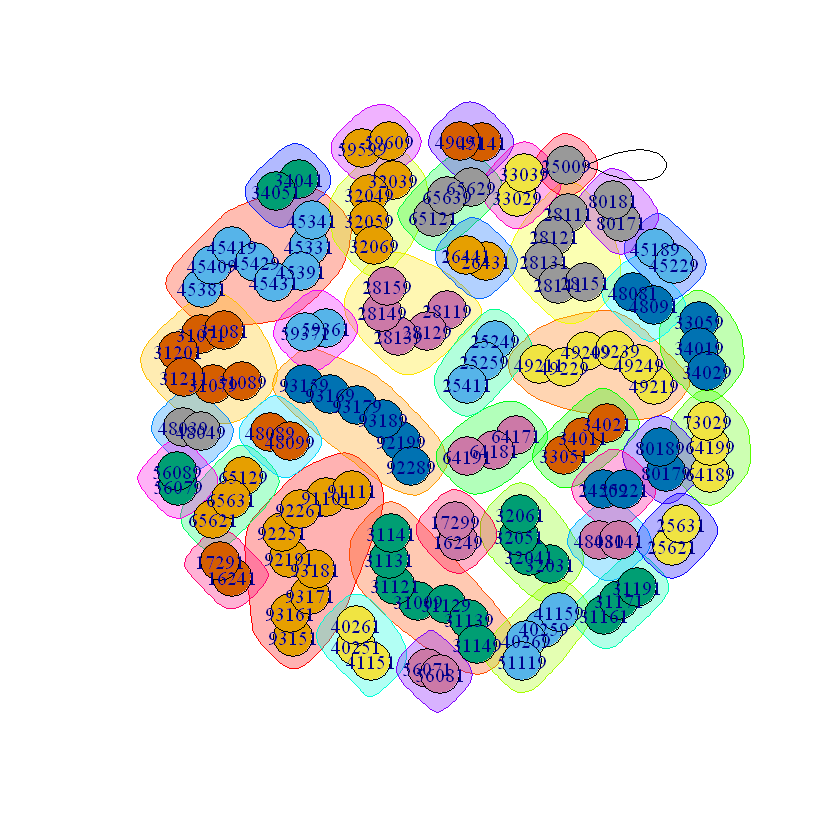

In [11]:

wc <- walktrap.community(routes_igraph )

#modularity calculates the modularity of a graph with respect to the given membership vector.
#Clauset, A.; Newman, M. E. J. & Moore, C. Finding community structure in very large networks,
#Phyisical Review E 2004, 70, 066111
modularity(wc)

membership(wc)
plot(wc, routes_igraph )


In [12]:
############################################################
# edge.betweenness.community
# Community structure detection based on edge betweenness
###########################################################
# Many networks consist of modules which are densely connected themselves 
#but sparsely connected to other modules.
#M Newman and M Girvan: Finding and evaluating community structure in networks, Physical
#Review E 69, 026113 (2004)
eb <- edge.betweenness.community(routes_igraph )
eb




Warning message in edge.betweenness.community(routes_igraph):
"At community.c:460 :Membership vector will be selected based on the lowest modularity score."Warning message in edge.betweenness.community(routes_igraph):
"At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances"

IGRAPH clustering edge betweenness, groups: 40, mod: 0.97
+ groups:
  $`1`
  [1] "16241" "17291"
  
  $`2`
  [1] "16249" "17299"
  
  $`3`
  [1] "24509" "25221"
  
  $`4`
  + ... omitted several groups/vertices

16241 16249 17291 17299 24509 25009 25221 25249 25259 25411 25621 25631 26431 
   32    34    32    34    31    40    31    10    10    10    22    22    29 
26441 28111 28119 28121 28129 28131 28139 28141 28149 28151 28159 31009 31071 
   29     8     7     8     7     8     7     8     7     8     7     4     3 
31079 31081 31089 31121 31129 31131 31139 31141 31149 31161 31171 31191 31201 
    3     3     3     4     4     4     4     4     4    28    28    28     3 
31211 32031 32039 32041 32049 32051 32059 32061 32069 33029 33039 33051 33059 
    3    26     9    26     9    26     9    26     9    20    20    12    13 
34011 34019 34021 34029 34041 34051 40251 40259 40261 40269 41151 41159 45141 
   12    13    12    13    17    17    27    25    27    25    27    25    36 
45189 45229 45331 45341 45381 45391 45409 45419 45429 45431 48031 48039 48041 
   24    24     2     2     2     2     2     2     2     2    35    37    35 
48049 48081 48089 48091 48099 49091 49209 49211 4921

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 9  8  6  7  6  6  5  5  4  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  4  4 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 
 3  3  2  2  2  2  2  2  2  2  2  2  2  1 

IGRAPH clustering fast greedy, groups: 40, mod: 0.97
+ groups:
  $`1`
  [1] "91101" "91111" "92191" "92251" "92261" "93151" "93161" "93171" "93181"
  
  $`2`
  [1] "45331" "45341" "45381" "45391" "45409" "45419" "45429" "45431"
  
  $`3`
  [1] "31071" "31079" "31081" "31089" "31201" "31211"
  
  $`4`
  + ... omitted several groups/vertices

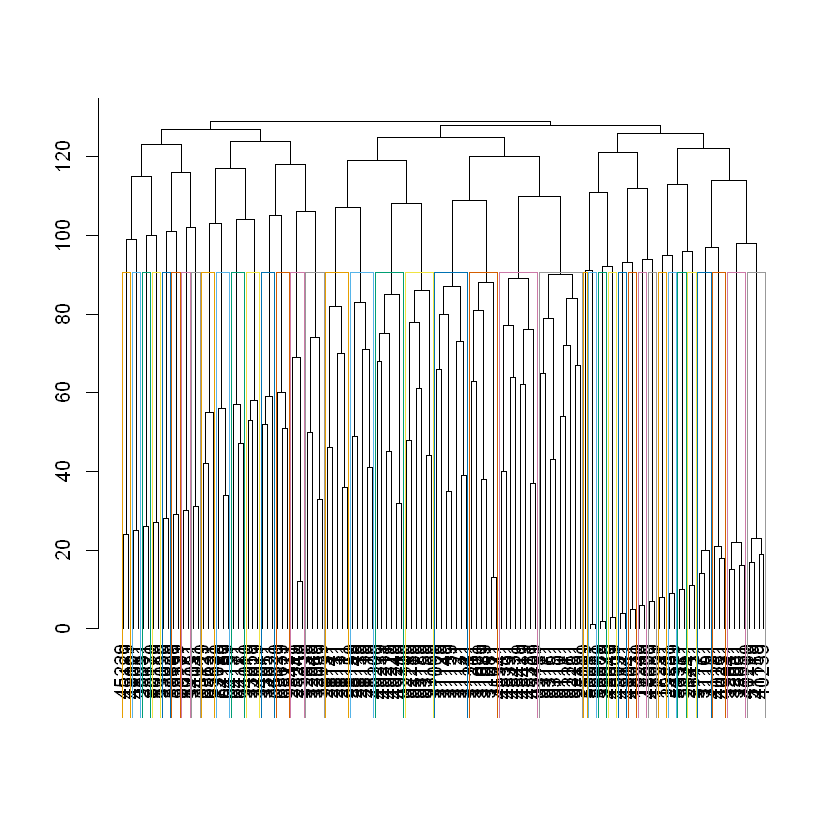

In [13]:
############################################################
# fastgreedy.community 
# Community structure via greedy optimization of modularity
###########################################################
#routes_igraph  <- add.edges(routes_igraph , c(1,6, 1,11, 6, 11))
#plot(routes_igraph )
fc <- fastgreedy.community(routes_igraph )
membership(fc)
sizes(fc)

#karate <- graph.famous("Zachary")
#plot(karate)
fc
dendPlot(fc)


In [14]:
##########################################################
# leading.eigenvector.community
# Community structure detecting based on the leading eigenvector of the
# community matrix
##########################################################
lec <- leading.eigenvector.community(routes_igraph )
lec
leading.eigenvector.community(routes_igraph , start=membership(lec))


IGRAPH clustering leading eigenvector, groups: 40, mod: 0.97
+ groups:
  $`1`
  [1] "16241" "17291"
  
  $`2`
  [1] "16249" "17299"
  
  $`3`
  [1] "24509" "25221"
  
  $`4`
  + ... omitted several groups/vertices

IGRAPH clustering leading eigenvector, groups: 40, mod: 0.97
+ groups:
  $`1`
  [1] "16241" "17291"
  
  $`2`
  [1] "16249" "17299"
  
  $`3`
  [1] "24509" "25221"
  
  $`4`
  + ... omitted several groups/vertices

In [ ]:
############################################################
# spinglass.community 
# Finding communities in graphs based on statistical meachanics
# This function tries to find communities in graphs via a 
# spin-glass model and simulated annealing.
############################################################
# J. Reichardt and S. Bornholdt: Statistical Mechanics of Community Detection, Phys. Rev. E, 74,
# 016110 (2006), http://arxiv.org/abs/cond-mat/0603718
# M. E. J. Newman and M. Girvan: Finding and evaluating community structure in networks, Phys.
# Rev. E 69, 026113 (2004)
# V.A. Traag and Jeroen Bruggeman: Community detection in networks with positive and negative
# links, http://arxiv.org/abs/0811.2329 (2008).
routes_igraph  <- induced.subgraph(routes_igraph , subcomponent(routes_igraph , 1))
plot(routes_igraph )
spinglass.community(routes_igraph , spins=2)
spinglass.community(routes_igraph , vertex=1)




In [ ]:


#infomap Method
imc <- infomap.community(routes_igraph )
membership(imc)
communities(imc)

